# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-05 23:59:49--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-05 23:59:49--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.1’

Gender_

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [ ]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [ ]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [ ]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [ ]:
# Contar la cantidad de tweets por etiqueta
label_counts = data['Label'].value_counts()
print(label_counts)

Label
non-biased    1596
biased         318
Name: count, dtype: int64


In [ ]:
# Resumen del conjunto de datos
print("Summary of the dataset:")
data.info()

print("\nStatistical summary of numerical columns:")
data.describe()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB

Statistical summary of numerical columns:


,Contents,Label
count,1914,1914
unique,1914,2
top,"vamos @arvenlol, dales duro como tú sabes #lo...",non-biased
freq,1,1596


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

 Realizando un análisis de las proporciones, observamos que el conjunto de datos presenta un marcado desbalance: el 83% de los tweets son 'non-biased' (1596) y solo el 17% son 'biased' (318).

Esta distribución es de suma importancia para el análisis de texto y para cualquier modelo predictivo que se construya sobre estos datos. La razón principal es que un modelo entrenado con datos tan desbalanceados tenderá a favorecer la clase mayoritaria ('non-biased'). Esto significa que, aunque el modelo pueda tener una alta precisión general (simplemente prediciendo 'non-biased' la mayoría de las veces), su capacidad para identificar correctamente los casos de la clase minoritaria ('biased'), que son precisamente los que nos interesan para detectar el sesgo, será limitada.

En términos analíticos, este desbalance nos advierte que métricas de evaluación comunes como la precisión simple (accuracy) pueden ser engañosas. Sería más apropiado usar métricas que consideren el rendimiento en ambas clases, como la precisión (precision), la exhaustividad (recall), la puntuación F1 o la matriz de confusión. Además, para construir un modelo robusto capaz de identificar el sesgo, probablemente necesitaríamos aplicar técnicas para manejar el desbalance de clases, como el sobremuestreo (oversampling) de la clase minoritaria, el submuestreo (undersampling) de la clase mayoritaria, o el uso de algoritmos que manejen inherentemente datos desbalanceados.

En resumen, la importancia de esta proporción radica en que nos revela la necesidad de un análisis y modelado cuidadoso para evitar sesgos en nuestras propias conclusiones o modelos, asegurando que podamos detectar efectivamente los tweets con sesgo a pesar de su menor representación en el conjunto de datos.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
## Cree una funcion limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

    # Ejemplo de uso
texto_ejemplo = 'Me encanta aprender análisis de texto en Python! porque aprender es interesante'
limpiar_texto(texto_ejemplo)

['encanta',
 'aprender',
 'análisis',
 'texto',
 'python',
 'aprender',
 'interesante']

In [ ]:
# Aplicar la limpieza de texto
data['cleaned_contents'] = data['Contents'].apply(limpiar_texto)
display(data.head())

,Contents,Label,cleaned_contents
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,"[chumeltorres, cabrón, tí, reciben, noticias, ..."
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,"[alguien, tan, amable, ir, hacerme, compra, ma..."
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"[jenniferduquee, hahaha, si, rico, nadamas, fa..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,"[evagelcot, ves, programa, favorito, sólo, enc..."
4,como siempre mi tortilla triunfa mas que otros...,non-biased,"[siempre, tortilla, triunfa, mas, platos, play..."


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [ ]:
# Separar los tweets por etiqueta
biased_tweets = data[data['Label'] == 'biased']['cleaned_contents']
non_biased_tweets = data[data['Label'] == 'non-biased']['cleaned_contents']

# Contar palabras en tweets 'biased'
biased_words = [word for sublist in biased_tweets for word in sublist]
biased_word_counts = Counter(biased_words)
print("Palabras más comunes en tweets 'biased':")
print(biased_word_counts.most_common(10))

# Contar palabras en tweets 'non-biased'
non_biased_words = [word for sublist in non_biased_tweets for word in sublist]
non_biased_word_counts = Counter(non_biased_words)
print("\nPalabras más comunes en tweets 'non-biased':")
print(non_biased_word_counts.most_common(10))

Palabras más comunes en tweets 'biased':
[('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]

Palabras más comunes en tweets 'non-biased':
[('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

**Análisis de Frecuencia de Palabras y su Relevancia**

Basándonos en el análisis de frecuencia de palabras para los tweets 'biased' y 'non-biased', podemos extraer las siguientes ideas clave:

- **Palabras más comunes en tweets 'biased' vs 'non-biased':** Al comparar las listas de palabras más frecuentes (obtenidas en la celda anterior), notamos diferencias significativas. En los tweets 'biased', palabras como 'mujer', 'mujeres', 'mamá' aparecen prominentemente. En contraste, los tweets 'non-biased' muestran palabras más generales y positivas como 'gracias', 'bien', 'año', 'hoy', 'día', 'días'. Esta diferencia inicial sugiere que los tweets con sesgo de género tienden a enfocarse en términos relacionados con el género de manera más explícita.

- **Palabras que sugieren un sesgo:** Sí, las palabras 'mujer' y 'mujeres' en particular, al ser términos centrales en el discurso de género, pueden sugerir un sesgo cuando aparecen con alta frecuencia en un contexto particular. La presencia de 'mamá' también podría indicar discusiones sobre roles de género tradicionales. Es importante destacar que la presencia de estas palabras por sí sola no siempre indica sesgo; el contexto en el que se usan es crucial. Sin embargo, su alta frecuencia en el conjunto 'biased' justifica una inspección más profunda de cómo se emplean estas palabras en esos tweets. La combinación de estas palabras con adjetivos o verbos específicos en el contexto de los tweets etiquetados como 'biased' sería el siguiente paso para confirmar y caracterizar el sesgo.

- **Uso por parte de las empresas para entender opiniones sesgadas:** Las empresas pueden capitalizar este tipo de análisis de varias maneras:
    - **Monitoreo de la marca:** Identificar si las conversaciones en torno a su marca o productos contienen lenguaje sesgado. Esto es vital para mantener una imagen de marca inclusiva y evitar controversias.
    - **Desarrollo de campañas de marketing inclusivas:** Al entender qué tipo de lenguaje se asocia con opiniones sesgadas, las empresas pueden diseñar mensajes de marketing que eviten inadvertidamente el uso de este lenguaje y, en su lugar, promuevan la inclusión.
    - **Identificación de segmentos de audiencia:** Comprender qué grupos o comunidades utilizan lenguaje sesgado puede ayudar a las empresas a adaptar sus estrategias de comunicación para abordar estas preocupaciones o educar a su audiencia.
    - **Mejora de la atención al cliente:** Detectar lenguaje sesgado en las interacciones de servicio al cliente permite a las empresas intervenir y abordar situaciones potencialmente problemáticas de manera proactiva y sensible.
    - **Análisis de productos/servicios:** Evaluar si hay percepciones de sesgo asociadas a sus productos o servicios basadas en el lenguaje utilizado en las opiniones de los clientes.

En resumen, el análisis de frecuencia de palabras, especialmente en conjuntos de datos etiquetados, proporciona una herramienta poderosa para que las empresas no solo detecten la presencia de sesgo en las conversaciones relevantes, sino también para comprender las palabras clave asociadas a este sesgo y utilizar esa información para informar sus estrategias de comunicación, marketing y desarrollo de productos de manera más consciente e inclusiva.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [ ]:
## Cree una funcion para geenrar nube de palabras
def generate_wordcloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

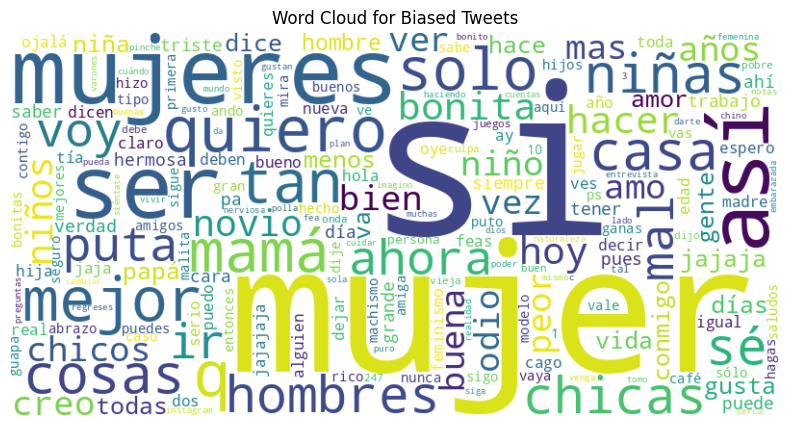

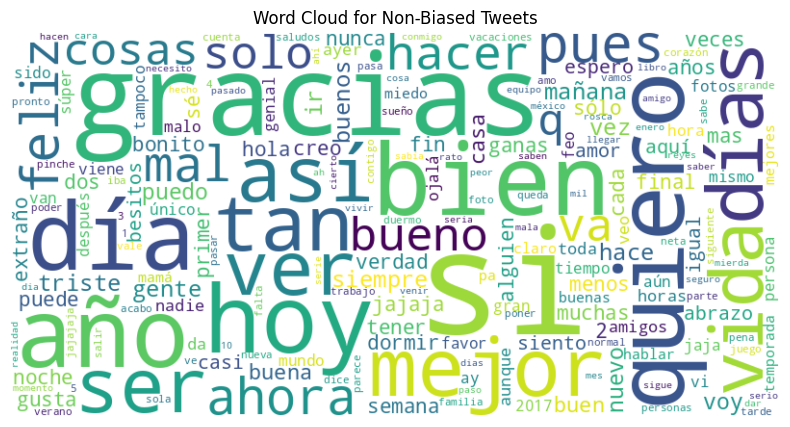

In [ ]:
# Generar nube de palabras para cada conjunto
generate_wordcloud(biased_word_counts, 'Word Cloud for Biased Tweets')
generate_wordcloud(non_biased_word_counts, 'Word Cloud for Non-Biased Tweets')

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

**Conclusiones y Perspectiva de Negocios**

Basándonos en el análisis realizado, que incluyó la exploración del desbalance de clases, el preprocesamiento de texto, el análisis de frecuencia de palabras y la visualización con nubes de palabras, podemos reflexionar sobre las siguientes preguntas con una perspectiva de negocio:

- **¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?**
    Este análisis proporciona una base sólida para mejorar la comunicación de la marca al identificar el lenguaje específico que se asocia con el sesgo de género. Las empresas pueden usar esta información para:
    - **Auditar sus propias comunicaciones:** Revisar materiales de marketing, mensajes en redes sociales, y comunicaciones internas para asegurarse de que no utilizan sin querer términos o frases identificadas como sesgadas.
    - **Capacitación del personal:** Educar a los equipos de marketing, ventas y atención al cliente sobre el lenguaje a evitar y cómo promover un lenguaje más inclusivo en sus interacciones con los clientes y el público.
    - **Desarrollo de guías de estilo:** Crear o actualizar guías de estilo de comunicación que incluyan directrices claras sobre el uso de lenguaje sensible al género y la promoción de la diversidad e inclusión.
    - **Diseño de mensajes proactivos:** Desarrollar campañas de comunicación que aborden activamente el sesgo de género, promuevan la igualdad y muestren el compromiso de la marca con la inclusión.

- **¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?**
    Si el análisis revela que las conversaciones en torno a la marca o en el público objetivo son predominantemente 'biased', se necesitarían ajustes significativos en la estrategia de marketing:
    - **Reevaluar el mensaje central:** Es posible que el mensaje de la campaña esté resonando de manera negativa o perpetuando estereotipos. Se debe revisar y ajustar el mensaje para que sea inclusivo y represente adecuadamente a la audiencia.
    - **Segmentación y enfoque:** Identificar si el sesgo proviene de un segmento específico de la audiencia y adaptar la comunicación para ese grupo, quizás con mensajes educativos o alternativos.
    - **Colaboración con influencers/voces inclusivas:** Asociarse con personas o grupos que promueven la igualdad de género para ayudar a contrarrestar el sesgo y promover un diálogo más constructivo.
    - **Monitoreo continuo:** Implementar sistemas de monitoreo en tiempo real para detectar y responder rápidamente a comentarios sesgados, mostrando que la marca está atenta y comprometida con un entorno respetuoso.
    - **Campañas de concienciación:** Considerar la posibilidad de lanzar campañas diseñadas específicamente para crear conciencia sobre el sesgo de género y promover un cambio positivo en la conversación.

- **¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?**
    Para obtener una comprensión más profunda y dinámica del sesgo de género en los tweets, se podrían explorar varios patrones en análisis futuros:
    - **Análisis de tendencias temporales:** Analizar cómo la frecuencia y el tipo de lenguaje sesgado cambian con el tiempo. Esto podría revelar si ciertas campañas, eventos o cambios sociales influyen en la prevalencia del sesgo.
    - **Análisis de contexto y co-ocurrencia:** Investigar con qué otras palabras, frases o temas aparecen comúnmente las palabras identificadas como sesgadas. Esto ayudaría a comprender el contexto en el que se manifiesta el sesgo.
    - **Análisis de sentimiento por etiqueta:** Realizar un análisis de sentimiento específico para los tweets 'biased' para entender las emociones y actitudes asociadas con el lenguaje sesgado.
    - **Análisis de la estructura de la conversación:** Examinar cómo se difunden los tweets sesgados, quién los comparte, y cómo se desarrollan las conversaciones en torno a ellos (e.g., si generan debate, acuerdo o rechazo).
    - **Análisis geográfico o demográfico:** Si los datos lo permiten, analizar si el sesgo se concentra en ciertas regiones geográficas o grupos demográficos.
    - **Análisis de temas (Topic Modeling):** Utilizar técnicas de modelado de temas para identificar los temas principales de discusión dentro de los tweets 'biased' y 'non-biased', proporcionando una visión más amplia de los temas asociados al sesgo.

Estos análisis futuros permitirían a las empresas no solo detectar el sesgo, sino también comprender mejor sus causas, su evolución y su impacto, permitiendo intervenciones más dirigidas y efectivas.